In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy as sp

This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.

In [2]:
#set current working directory
#os.chdir('/Users/sergiocalderon/Documents/Documentos - iMac de Sergio/Documentos iMac Sergio/Cursos/Time Series')
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
print(df)
print(type(df))

          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
0          1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW    1.79   
1          2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW    4.92   
2          3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW    6.71   
3          4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW    9.84   
4          5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW   12.97   
...      ...   ...    ...  ...   ...    ...   ...   ...     ...  ...     ...   
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is  Ir  
0       0   0  
1      

En seguida se crea una columna de fechas

In [4]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'],
month=row['month'], day=row['day'],
hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

In [5]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


Text(0.5, 1.0, 'Box plot of Air Pressure')

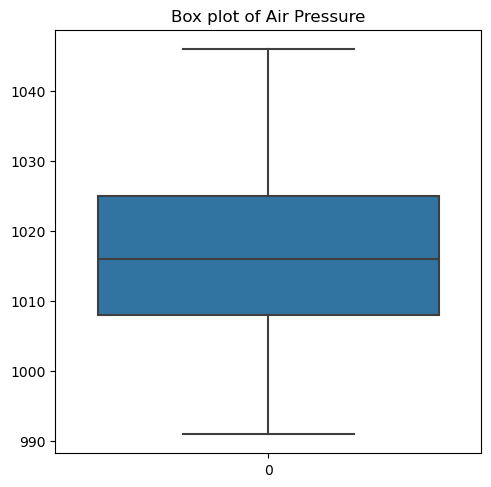

In [6]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['PRES']) 
g.set_title('Box plot of Air Pressure')

Text(0.5, 1.0, 'Time series of Air Pressure')

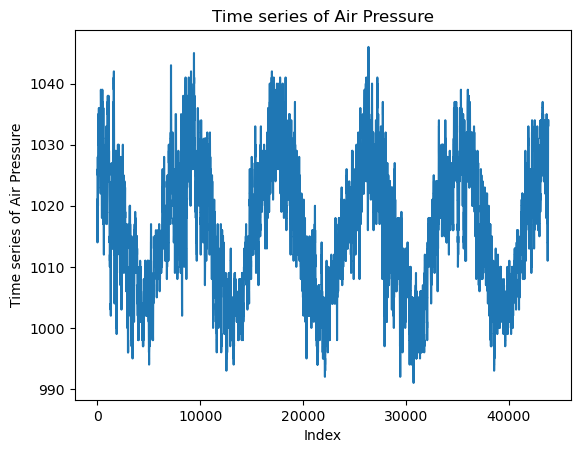

In [7]:
g = plt.plot(df['PRES'])
plt.xlabel('Index') 
plt.ylabel('Time series of Air Pressure') 
plt.title(label='Time series of Air Pressure') 

In [8]:
indice=df['datetime']
PRESdf =pd.DataFrame(df['PRES'].values,index=indice)


In [9]:
PRESdf.head(10)
type(PRESdf)

pandas.core.frame.DataFrame

In [10]:
PRESdf

,0
datetime,
2010-01-01 00:00:00,1021.0
2010-01-01 01:00:00,1020.0
2010-01-01 02:00:00,1019.0
2010-01-01 03:00:00,1019.0
2010-01-01 04:00:00,1018.0
...,...
2014-12-31 19:00:00,1034.0
2014-12-31 20:00:00,1034.0
2014-12-31 21:00:00,1034.0


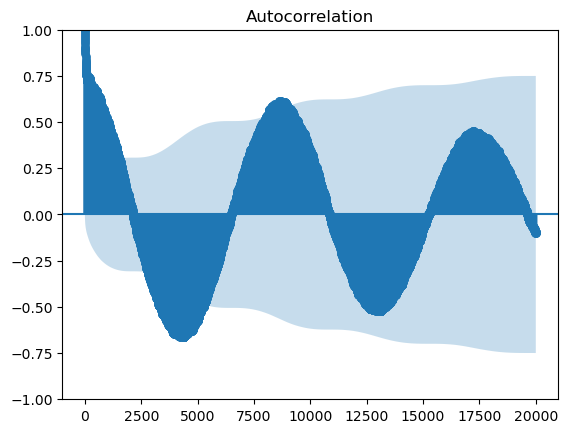

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(PRESdf,lags=20000)
plt.show()

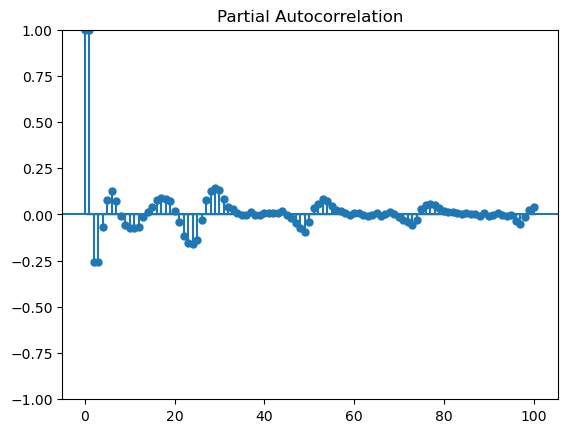

In [12]:
plot_pacf(PRESdf,lags=100,method='ldbiased')
plt.show()

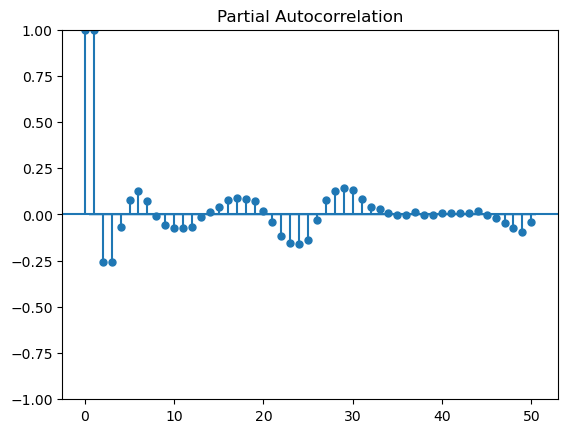

In [13]:
plot_pacf(PRESdf,lags=50,method='ldbiased')
plt.show()

5
0.00011409273457466229
8764.8


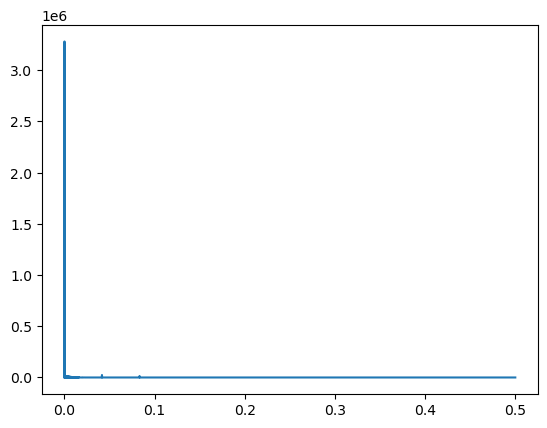

In [14]:
f, Pxx_den=sp.signal.periodogram(df['PRES'])
plt.plot(f, Pxx_den)
#plt.axvline(x=1/50,color='red')
max_index_value = np.argmax(Pxx_den, axis=0)
print(max_index_value)
frecuencia_max=f[max_index_value]
print(frecuencia_max)
print(1/frecuencia_max)

Note que 8764.8/24=365.2 que corresponde a un ciclo anual, sin embargo no se ve el ciclo diario o semanal.

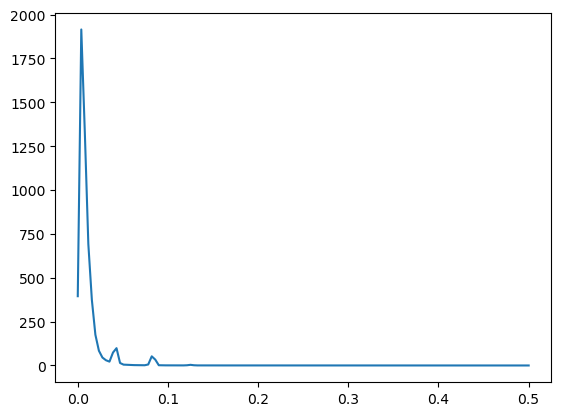

In [15]:
f_welch, Pxx_den_welch=sp.signal.welch(df['PRES'])
plt.plot(f_welch, Pxx_den_welch)


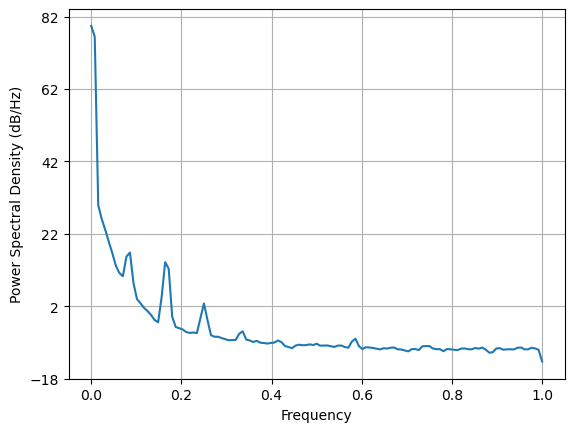

In [16]:
import matplotlib as mpl
Pxx, Freqs, lines=mpl.pyplot.psd(df['PRES'],return_line=True)

2024-03-07 16:46:10.638319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-07 16:46:37.742623: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


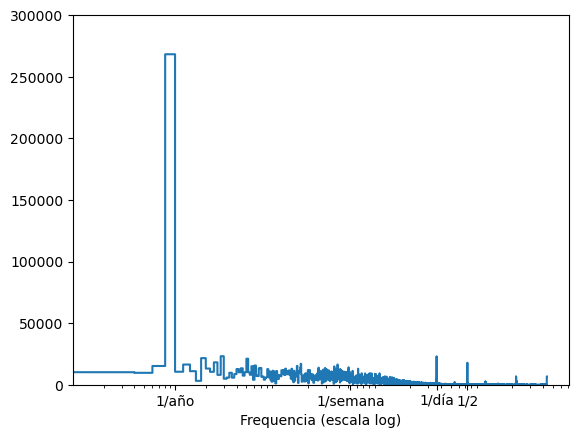

In [17]:
import tensorflow as tf
fft = tf.signal.rfft(df['PRES'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['PRES'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 300000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1,52.17891428571429 ,365.2524,365.2524*2], labels=['1/año', '1/semana','1/día','1/2'])
_ = plt.xlabel('Frequencia (escala log)')

Es importante señalar que dependiendo la hora del día, parece haber un valor medio distinto dependiendo del día. También parecer haber un comportamineto estacional de forma anual, es decir, el valor medio de la hora depende drel mes del año. 

 Adicionalmente podemos observar que el día de la semana no afecta el valor medio de la variable presión. Por lo tanto, se van a considerar solo dos componente, una para que tenga encuenta la hra del día y otro para que tenga en cuenta que el comportamiento anual, es decir, para que tenga en cuenta que al princiio del año el valor de la presión es mas lata y que al mediados es mas baja, mientras que en los meses intermedio el valor es fluctuante.

In [18]:
365.2524*24

8766.0576

In [19]:
#print(fft)
print(f_per_year)

[0.00000000e+00 2.00028697e-01 4.00057393e-01 ... 4.38262874e+03
 4.38282877e+03 4.38302880e+03]


Note que en este, caso la escala de la frecuencia está escalada para que sea leía por año.

In [20]:
date_time=df['datetime']
type(date_time)


pandas.core.series.Series

In [21]:
date_time.map(pd.Timestamp.timestamp) ###Convierte las fechas a float 

0        1.262304e+09
1        1.262308e+09
2        1.262311e+09
3        1.262315e+09
4        1.262318e+09
             ...     
43819    1.420052e+09
43820    1.420056e+09
43821    1.420060e+09
43822    1.420063e+09
43823    1.420067e+09
Name: datetime, Length: 43824, dtype: float64

#### Convertir las fechas en valores numéricos

Note que el tiempo va a ser convertido a segundos, por lo tanto debemos escribir los ciclos a segundos.

In [22]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

0        1.262304e+09
1        1.262308e+09
2        1.262311e+09
3        1.262315e+09
4        1.262318e+09
             ...     
43819    1.420052e+09
43820    1.420056e+09
43821    1.420060e+09
43822    1.420063e+09
43823    1.420067e+09
Name: datetime, Length: 43824, dtype: float64

In [23]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

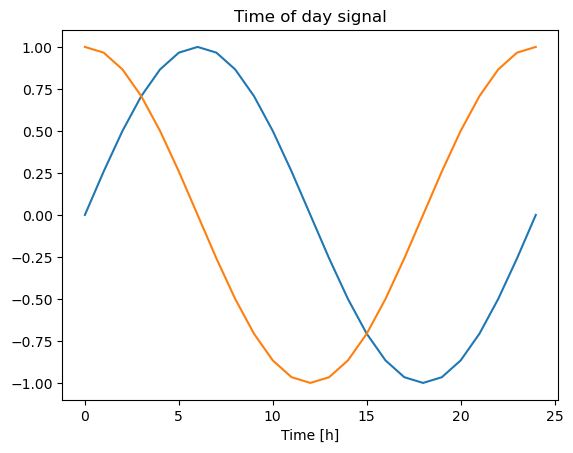

In [24]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of year signal')

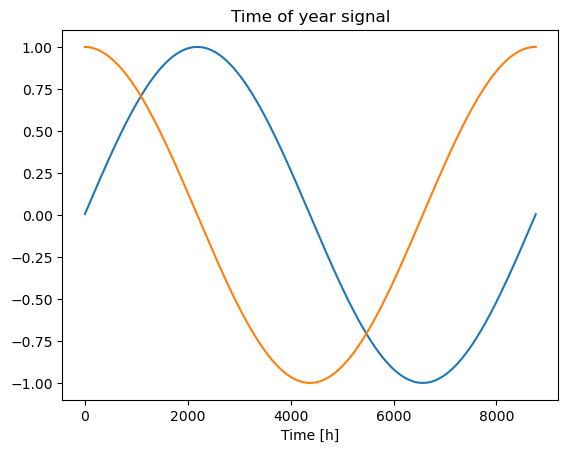

In [25]:
plt.plot(np.array(df['Year sin'])[:8766])
plt.plot(np.array(df['Year cos'])[:8766])
plt.xlabel('Time [h]')
plt.title('Time of year signal')

In [26]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir', 'datetime', 'Day sin', 'Day cos', 'Year sin',
       'Year cos'],
      dtype='object')

## Creación alternativa de covariables

In [27]:
indice=df['datetime']
PRESdf_alt =pd.DataFrame(df[['PRES','Day sin', 'Day cos', 'Year sin','Year cos','datetime']])


In [28]:
PRESdf_alt

,PRES,Day sin,Day cos,Year sin,Year cos,datetime
0,1021.0,-4.416858e-12,1.000000,0.005161,0.999987,2010-01-01 00:00:00
1,1020.0,2.588190e-01,0.965926,0.005878,0.999983,2010-01-01 01:00:00
2,1019.0,5.000000e-01,0.866025,0.006594,0.999978,2010-01-01 02:00:00
3,1019.0,7.071068e-01,0.707107,0.007311,0.999973,2010-01-01 03:00:00
4,1018.0,8.660254e-01,0.500000,0.008028,0.999968,2010-01-01 04:00:00
...,...,...,...,...,...,...
43819,1034.0,-9.659258e-01,0.258819,-0.002079,0.999998,2014-12-31 19:00:00
43820,1034.0,-8.660254e-01,0.500000,-0.001362,0.999999,2014-12-31 20:00:00
43821,1034.0,-7.071068e-01,0.707107,-0.000645,1.000000,2014-12-31 21:00:00
43822,1034.0,-5.000000e-01,0.866025,0.000072,1.000000,2014-12-31 22:00:00


In [29]:
indice

0       2010-01-01 00:00:00
1       2010-01-01 01:00:00
2       2010-01-01 02:00:00
3       2010-01-01 03:00:00
4       2010-01-01 04:00:00
                ...        
43819   2014-12-31 19:00:00
43820   2014-12-31 20:00:00
43821   2014-12-31 21:00:00
43822   2014-12-31 22:00:00
43823   2014-12-31 23:00:00
Name: datetime, Length: 43824, dtype: datetime64[ns]

In [30]:
PRES_alt_df = PRESdf_alt.set_index('datetime')

In [31]:
PRES_alt_df

,PRES,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
2010-01-01 00:00:00,1021.0,-4.416858e-12,1.000000,0.005161,0.999987
2010-01-01 01:00:00,1020.0,2.588190e-01,0.965926,0.005878,0.999983
2010-01-01 02:00:00,1019.0,5.000000e-01,0.866025,0.006594,0.999978
2010-01-01 03:00:00,1019.0,7.071068e-01,0.707107,0.007311,0.999973
2010-01-01 04:00:00,1018.0,8.660254e-01,0.500000,0.008028,0.999968
...,...,...,...,...,...
2014-12-31 19:00:00,1034.0,-9.659258e-01,0.258819,-0.002079,0.999998
2014-12-31 20:00:00,1034.0,-8.660254e-01,0.500000,-0.001362,0.999999
2014-12-31 21:00:00,1034.0,-7.071068e-01,0.707107,-0.000645,1.000000


## Entrenamiento Validacion y Prueba

In [32]:
column_indices = {name: i for i, name in enumerate(PRES_alt_df.columns)}

n = len(PRES_alt_df)
train_dfPRES = PRES_alt_df[0:int(n*0.7)]
val_dfPRES = PRES_alt_df[int(n*0.7):int(n*0.9)]
test_dfPRES = PRES_alt_df[int(n*0.9):]

num_features = PRES_alt_df.shape[1]
num_features

5

In [33]:
train_dfPRES

,PRES,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
2010-01-01 00:00:00,1021.0,-4.416858e-12,1.000000,0.005161,0.999987
2010-01-01 01:00:00,1020.0,2.588190e-01,0.965926,0.005878,0.999983
2010-01-01 02:00:00,1019.0,5.000000e-01,0.866025,0.006594,0.999978
2010-01-01 03:00:00,1019.0,7.071068e-01,0.707107,0.007311,0.999973
2010-01-01 04:00:00,1018.0,8.660254e-01,0.500000,0.008028,0.999968
...,...,...,...,...,...
2013-07-01 23:00:00,995.0,-2.588190e-01,0.965926,0.001555,-0.999999
2013-07-02 00:00:00,994.0,-1.150846e-11,1.000000,0.000839,-1.000000
2013-07-02 01:00:00,995.0,2.588190e-01,0.965926,0.000122,-1.000000


In [34]:
val_dfPRES

,PRES,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
2013-07-02 04:00:00,994.0,0.866025,5.000000e-01,-0.002028,-0.999998
2013-07-02 05:00:00,994.0,0.965926,2.588190e-01,-0.002745,-0.999996
2013-07-02 06:00:00,994.0,1.000000,-4.801153e-13,-0.003462,-0.999994
2013-07-02 07:00:00,995.0,0.965926,-2.588190e-01,-0.004179,-0.999991
2013-07-02 08:00:00,996.0,0.866025,-5.000000e-01,-0.004896,-0.999988
...,...,...,...,...,...
2014-07-02 04:00:00,1003.0,0.866025,5.000000e-01,0.002143,-0.999998
2014-07-02 05:00:00,1003.0,0.965926,2.588190e-01,0.001426,-0.999999
2014-07-02 06:00:00,1004.0,1.000000,2.160132e-12,0.000710,-1.000000


In [35]:
test_dfPRES

,PRES,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
2014-07-02 09:00:00,1004.0,7.071068e-01,-0.707107,-0.001441,-0.999999
2014-07-02 10:00:00,1004.0,5.000000e-01,-0.866025,-0.002158,-0.999998
2014-07-02 11:00:00,1004.0,2.588190e-01,-0.965926,-0.002874,-0.999996
2014-07-02 12:00:00,1003.0,4.723477e-12,-1.000000,-0.003591,-0.999994
2014-07-02 13:00:00,1003.0,-2.588190e-01,-0.965926,-0.004308,-0.999991
...,...,...,...,...,...
2014-12-31 19:00:00,1034.0,-9.659258e-01,0.258819,-0.002079,0.999998
2014-12-31 20:00:00,1034.0,-8.660254e-01,0.500000,-0.001362,0.999999
2014-12-31 21:00:00,1034.0,-7.071068e-01,0.707107,-0.000645,1.000000


## Normalización

In [36]:
train_mean = train_dfPRES.mean()
train_std = train_dfPRES.std()

train_df = (train_dfPRES - train_mean) / train_std
val_df = (val_dfPRES - train_mean) / train_std
test_df = (test_dfPRES - train_mean) / train_std

Note que se podría analizar que pasa cuando se tiene como variables predictoras solo a estas variables determinísticas, o como viene enseguida sólo con variables rezagadas. Finalmente, se pueden unir características de ambas y formar predictoras de las dos naturalezas.

## Creación de variables rezagadas

Note que vamos a enfocarnos en la predicción 1 paso adelante.

In [37]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [38]:
for i in range(7,0,-1):
    df1[['t-'+str(i)]] = PRESdf.shift(i)

In [39]:
print(df1)

                        t-7     t-6     t-5     t-4     t-3     t-2     t-1
datetime                                                                   
2010-01-01 00:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN
2010-01-01 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN  1021.0
2010-01-01 02:00:00     NaN     NaN     NaN     NaN     NaN  1021.0  1020.0
2010-01-01 03:00:00     NaN     NaN     NaN     NaN  1021.0  1020.0  1019.0
2010-01-01 04:00:00     NaN     NaN     NaN  1021.0  1020.0  1019.0  1019.0
...                     ...     ...     ...     ...     ...     ...     ...
2014-12-31 19:00:00  1033.0  1032.0  1032.0  1032.0  1032.0  1033.0  1033.0
2014-12-31 20:00:00  1032.0  1032.0  1032.0  1032.0  1033.0  1033.0  1034.0
2014-12-31 21:00:00  1032.0  1032.0  1032.0  1033.0  1033.0  1034.0  1034.0
2014-12-31 22:00:00  1032.0  1032.0  1033.0  1033.0  1034.0  1034.0  1034.0
2014-12-31 23:00:00  1032.0  1033.0  1033.0  1034.0  1034.0  1034.0  1034.0

[43824 rows

In [40]:
# Create column t
df1['t'] = PRESdf.values
print(df1.head(8))

                        t-7     t-6     t-5     t-4     t-3     t-2     t-1  \
datetime                                                                      
2010-01-01 00:00:00     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2010-01-01 01:00:00     NaN     NaN     NaN     NaN     NaN     NaN  1021.0   
2010-01-01 02:00:00     NaN     NaN     NaN     NaN     NaN  1021.0  1020.0   
2010-01-01 03:00:00     NaN     NaN     NaN     NaN  1021.0  1020.0  1019.0   
2010-01-01 04:00:00     NaN     NaN     NaN  1021.0  1020.0  1019.0  1019.0   
2010-01-01 05:00:00     NaN     NaN  1021.0  1020.0  1019.0  1019.0  1018.0   
2010-01-01 06:00:00     NaN  1021.0  1020.0  1019.0  1019.0  1018.0  1017.0   
2010-01-01 07:00:00  1021.0  1020.0  1019.0  1019.0  1018.0  1017.0  1017.0   

                          t  
datetime                     
2010-01-01 00:00:00  1021.0  
2010-01-01 01:00:00  1020.0  
2010-01-01 02:00:00  1019.0  
2010-01-01 03:00:00  1019.0  
2010-01-01 04:00:00  1018.0  

In [41]:
# Create a new subsetted dataframe, removing Nans from first 7 rows
df1_PRES = df1[7:]
print(df1_PRES.head(7))
df1_PRES.shape

                        t-7     t-6     t-5     t-4     t-3     t-2     t-1  \
datetime                                                                      
2010-01-01 07:00:00  1021.0  1020.0  1019.0  1019.0  1018.0  1017.0  1017.0   
2010-01-01 08:00:00  1020.0  1019.0  1019.0  1018.0  1017.0  1017.0  1017.0   
2010-01-01 09:00:00  1019.0  1019.0  1018.0  1017.0  1017.0  1017.0  1017.0   
2010-01-01 10:00:00  1019.0  1018.0  1017.0  1017.0  1017.0  1017.0  1017.0   
2010-01-01 11:00:00  1018.0  1017.0  1017.0  1017.0  1017.0  1017.0  1017.0   
2010-01-01 12:00:00  1017.0  1017.0  1017.0  1017.0  1017.0  1017.0  1017.0   
2010-01-01 13:00:00  1017.0  1017.0  1017.0  1017.0  1017.0  1017.0  1015.0   

                          t  
datetime                     
2010-01-01 07:00:00  1017.0  
2010-01-01 08:00:00  1017.0  
2010-01-01 09:00:00  1017.0  
2010-01-01 10:00:00  1017.0  
2010-01-01 11:00:00  1017.0  
2010-01-01 12:00:00  1015.0  
2010-01-01 13:00:00  1015.0  


(43817, 8)

# Dividir los datos en repuestas y Covariables, entrenamiento, validación y prueba.

In [42]:
# Split data

PRESsplit = df1_PRES.values
# split into lagged variables and original time series
X1= PRESsplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =PRESsplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [43]:
print(X1)
print(y1)

[[1021. 1020. 1019. ... 1018. 1017. 1017.]
 [1020. 1019. 1019. ... 1017. 1017. 1017.]
 [1019. 1019. 1018. ... 1017. 1017. 1017.]
 ...
 [1032. 1032. 1032. ... 1033. 1034. 1034.]
 [1032. 1032. 1033. ... 1034. 1034. 1034.]
 [1032. 1033. 1033. ... 1034. 1034. 1034.]]
[1017. 1017. 1017. ... 1034. 1034. 1034.]


Primero dividiremos nuestro conjunto de datos en entrenamiento(90%) y prueba(10%), luego el entrenamiento será dividido en entrenamiento(80% del 90%) y validación(20% del 90%).

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X1,y1,test_size=0.1, train_size=0.9,shuffle=False)

In [46]:
print(X_train_full.shape)
print(X_test.shape)

print(y_train_full.shape)
print(y_test.shape)

(39435, 7)
(4382, 7)
(39435,)
(4382,)


In [47]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.2, train_size=0.8,shuffle=False)

In [48]:
print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(31548, 7)
(7887, 7)
(31548,)
(7887,)


In [49]:
31548+7887+4382

43817

Vamos a chequear que los valores quedaron consecutivos

In [50]:
y_train

array([1017., 1017., 1017., ..., 1002., 1002., 1002.])

In [51]:
y_val

array([1001., 1000., 1002., ..., 1004., 1004., 1004.])

In [52]:
y_test

array([1004., 1004., 1003., ..., 1034., 1034., 1034.])

# Normalización de las covariables únicamente

Note que para éste caso se elige la normalización MinMaxScaler, es decir, transforma todas las variables a que tomen valores entre 0 y 1. Vale la pena decir que esta transformación es basada en el conjuto de entrenamiento, y aplicada con esos parámetros(Min y Max), a los tres conjuntos entrenamiento , validación y prueba.

In [53]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [54]:
X_train

array([[0.54545455, 0.52727273, 0.50909091, ..., 0.49090909, 0.47272727,
        0.47272727],
       [0.52727273, 0.50909091, 0.50909091, ..., 0.47272727, 0.47272727,
        0.47272727],
       [0.50909091, 0.50909091, 0.49090909, ..., 0.47272727, 0.47272727,
        0.47272727],
       ...,
       [0.21818182, 0.2       , 0.21818182, ..., 0.21818182, 0.2       ,
        0.21818182],
       [0.2       , 0.21818182, 0.21818182, ..., 0.2       , 0.21818182,
        0.2       ],
       [0.21818182, 0.21818182, 0.21818182, ..., 0.21818182, 0.2       ,
        0.2       ]])

In [55]:
y_train

array([1017., 1017., 1017., ..., 1002., 1002., 1002.])

In [56]:
X_test

array([[0.23636364, 0.21818182, 0.21818182, ..., 0.23636364, 0.23636364,
        0.23636364],
       [0.21818182, 0.21818182, 0.23636364, ..., 0.23636364, 0.23636364,
        0.23636364],
       [0.21818182, 0.23636364, 0.23636364, ..., 0.23636364, 0.23636364,
        0.23636364],
       ...,
       [0.74545455, 0.74545455, 0.74545455, ..., 0.76363636, 0.78181818,
        0.78181818],
       [0.74545455, 0.74545455, 0.76363636, ..., 0.78181818, 0.78181818,
        0.78181818],
       [0.74545455, 0.76363636, 0.76363636, ..., 0.78181818, 0.78181818,
        0.78181818]])

In [57]:
y_test

array([1004., 1004., 1003., ..., 1034., 1034., 1034.])

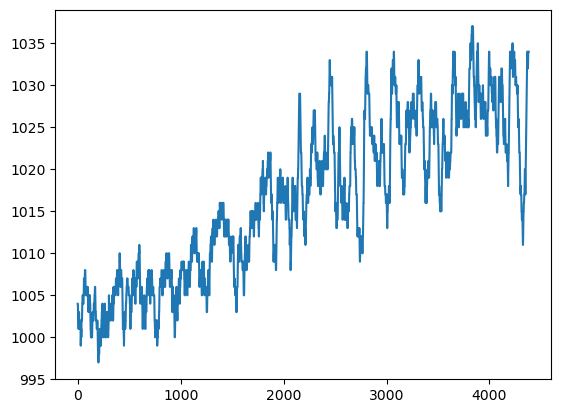

In [58]:
plt.plot(y_test)

In [59]:
X_val

array([[0.21818182, 0.21818182, 0.2       , ..., 0.2       , 0.2       ,
        0.2       ],
       [0.21818182, 0.2       , 0.21818182, ..., 0.2       , 0.2       ,
        0.18181818],
       [0.2       , 0.21818182, 0.2       , ..., 0.2       , 0.18181818,
        0.16363636],
       ...,
       [0.25454545, 0.23636364, 0.23636364, ..., 0.21818182, 0.21818182,
        0.23636364],
       [0.23636364, 0.23636364, 0.23636364, ..., 0.21818182, 0.23636364,
        0.23636364],
       [0.23636364, 0.23636364, 0.21818182, ..., 0.23636364, 0.23636364,
        0.23636364]])

In [60]:
y_val

array([1001., 1000., 1002., ..., 1004., 1004., 1004.])

In [61]:
import tensorflow.keras as keras

# Red Nueronal con una sola Capa oculta(MLP)
La siguiente es la configuración de una red neuronal con una sola capa oculta

In [62]:
model=keras.models.Sequential([keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.compile(loss="mean_squared_error",optimizer="adam")
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val)) #está tomando por defecto 32 del tamaño del lote, que sucede si es mayor o menor? Se puede modificar usando  el argumento batch_size= 

Epoch 1/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4460 - val_loss: 0.4296
Epoch 2/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4436 - val_loss: 0.4090
Epoch 3/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4491 - val_loss: 0.4091
Epoch 4/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4383 - val_loss: 0.4112
Epoch 5/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4473 - val_loss: 0.4992
Epoch 6/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4533 - val_loss: 0.4345
Epoch 7/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4458 - val_loss: 0.4157
Epoch 8/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4472 - val_loss: 0.4146
Epoch 9/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4483 - val_loss: 0.4075
Epoch 10/50
986/986 [==============================] - 2s 2ms/step - loss: 0.4430 - val_loss: 0.4609

In [128]:
31548/32

985.875

<Axes: >

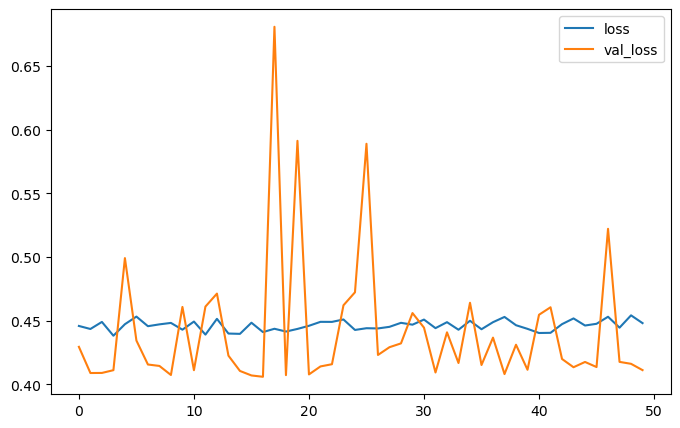

In [129]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [65]:
mse_test=model.evaluate(X_test,y_test)


137/137 [==============================] - 0s 861us/step - loss: 0.3753


In [66]:
print(mse_test)

0.3753413259983063


In [67]:
ypred=model.predict(X_test)
print(ypred)

137/137 [==============================] - 0s 611us/step
[[1004.12274]
 [1003.9488 ]
 [1003.9867 ]
 ...
 [1034.3835 ]
 [1034.1389 ]
 [1034.0166 ]]


Text(0.5, 0, 'Index')

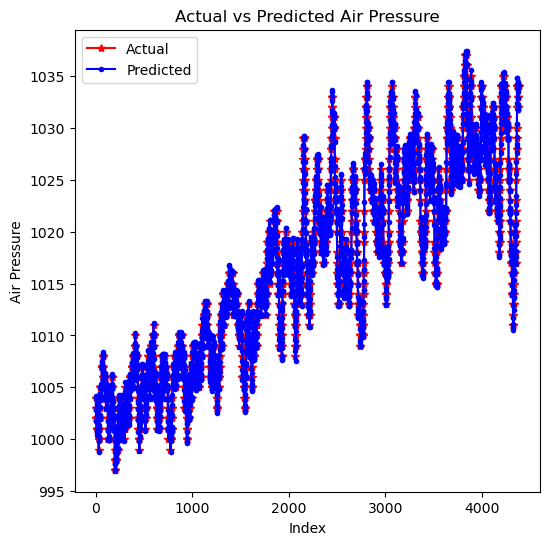

In [68]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

Text(0.5, 0, 'Index')

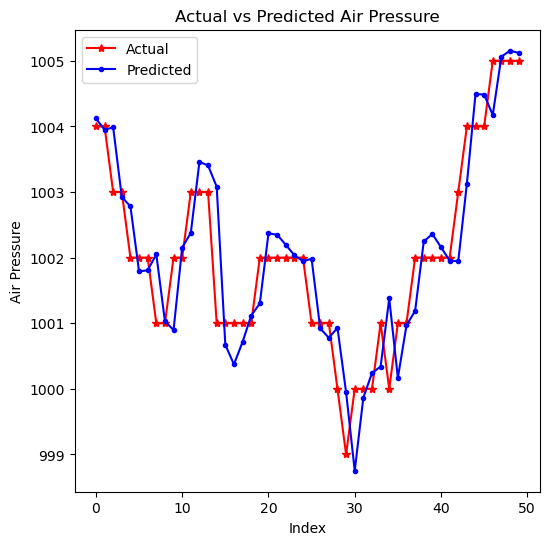

In [69]:
plt.figure(figsize=(6, 6))
plt.plot(range(50), y_test[0:50], linestyle='-', marker='*', color='r')
plt.plot(range(50), ypred[0:50], linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

# Modelos mas complejos

In [70]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(32,activation="linear")(input_layer)
hidden2 = keras.layers.Dense(16,activation="linear")(hidden1)
hidden3 = keras.layers.Dense(16,activation="linear")(hidden2)
#dropout_layer = keras.layers.Dropout(0.2)(hidden3)
#output_layer = keras.layers.Dense(1, activation='linear')(dropout_layer)
output_layer = keras.layers.Dense(1, activation='linear')(hidden3)

In [71]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_2 (Dense)             (None, 32)                256       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [134]:
print("Input shape:", X_train.shape)
print("Target shape:", y_train.shape)

Input shape: (31548, 7)
Target shape: (31548,)


In [133]:
type(X_train)

numpy.ndarray

In [72]:
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(X_train,y_train,epochs=50,batch_size=16,validation_data=(X_val,y_val))

Epoch 1/50
1972/1972 [==============================] - 2s 977us/step - loss: 97783.6250 - val_loss: 2.3837
Epoch 2/50
1972/1972 [==============================] - 2s 948us/step - loss: 2.1952 - val_loss: 2.0204
Epoch 3/50
1972/1972 [==============================] - 2s 948us/step - loss: 1.9615 - val_loss: 1.7908
Epoch 4/50
1972/1972 [==============================] - 2s 1ms/step - loss: 1.8487 - val_loss: 2.5965
Epoch 5/50
1972/1972 [==============================] - 2s 938us/step - loss: 1.6661 - val_loss: 1.1796
Epoch 6/50
1972/1972 [==============================] - 2s 969us/step - loss: 1.5764 - val_loss: 2.8823
Epoch 7/50
1972/1972 [==============================] - 2s 949us/step - loss: 1.2311 - val_loss: 2.7717
Epoch 8/50
1972/1972 [==============================] - 2s 958us/step - loss: 1.0721 - val_loss: 1.9620
Epoch 9/50
1972/1972 [==============================] - 2s 959us/step - loss: 0.9460 - val_loss: 0.8932
Epoch 10/50
1972/1972 [==============================] - 2s 95

<Axes: >

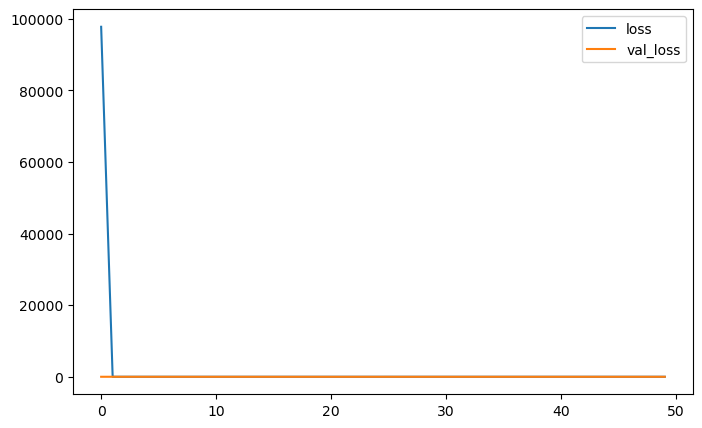

In [74]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [75]:
mse_test=ts_model.evaluate(X_test,y_test)

137/137 [==============================] - 0s 697us/step - loss: 1.0356


In [76]:
print(mse_test)

1.035582423210144


In [77]:
preds_ts_model=ts_model.predict(X_test)
print(preds_ts_model)

137/137 [==============================] - 0s 639us/step
[[1003.18195]
 [1003.0314 ]
 [1003.0835 ]
 ...
 [1033.4591 ]
 [1033.2378 ]
 [1033.1268 ]]


Text(0.5, 0, 'Index')

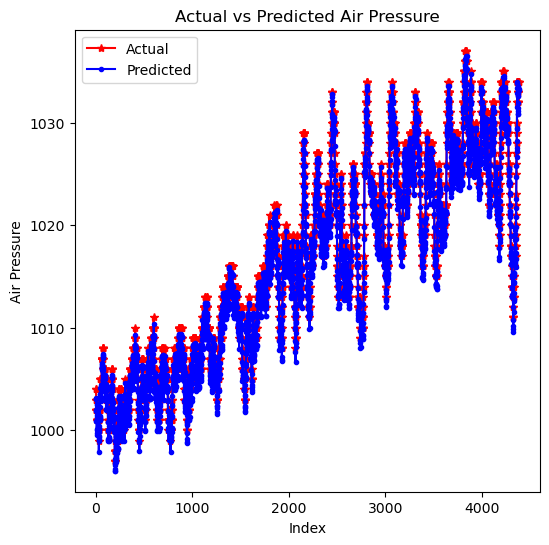

In [78]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(preds_ts_model.size), preds_ts_model, linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

Text(0.5, 0, 'Index')

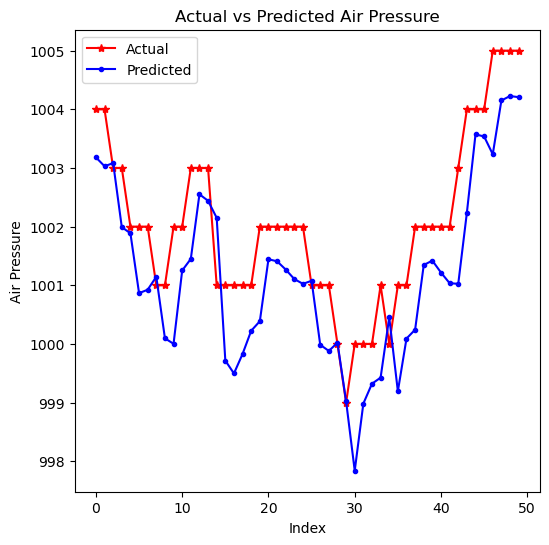

In [79]:
plt.figure(figsize=(6, 6))
plt.plot(range(50), y_test[0:50], linestyle='-', marker='*', color='r')
plt.plot(range(50), preds_ts_model[0:50], linestyle='-', marker='.', color='b') 
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

# Busqueda de los hiperparámetros

In [81]:
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers

In [116]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int("num_units", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-3, max_value=1e-2,step=0.003)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=["mean_squared_error"]
    )
    return model


build_model(kt.HyperParameters())

In [117]:
tuner_GridSearch_mlp = kt.GridSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=None,
    executions_per_trial=1,
    overwrite=True,
    directory="dirsalida",
    project_name="helloworld",
)

In [118]:
tuner_GridSearch_mlp.search_space_summary()

Search space summary
Default search space size: 6
num_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': 0.003, 'sampling': 'linear'}


In [119]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2)

In [120]:
tuner_GridSearch_mlp.search(X_train,y_train, epochs=20, validation_data=(X_val,y_val),callbacks=[stop_early])

Trial 240 Complete [00h 00m 21s]
val_loss: 122.15534210205078

Best val_loss So Far: 0.40830931067466736
Total elapsed time: 02h 38m 30s


In [141]:
# Get the top 2 models.
models_mlp = tuner_GridSearch_mlp.get_best_models(num_models=2)
best_model_mlp = models_mlp[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model_mlp.build(input_shape=(32, 1, 7))
best_model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 1, 32)               256       
                                                                 
 dense_1 (Dense)             (32, 1, 32)               1056      
                                                                 
 dense_2 (Dense)             (32, 1, 1)                33        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


# Los mejores 10 modelos



In [142]:
tuner_GridSearch_mlp.results_summary()

Results summary
Results in dirsalida/helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0001 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 1
units_0: 32
dropout: False
lr: 0.004
Score: 0.40830931067466736

Trial 0117 summary
Hyperparameters:
num_units: 64
activation: relu
num_layers: 1
units_0: 32
dropout: False
lr: 0.007
units_1: 64
Score: 0.41163086891174316

Trial 0112 summary
Hyperparameters:
num_units: 64
activation: relu
num_layers: 1
units_0: 32
dropout: False
lr: 0.001
units_1: 32
Score: 0.41589322686195374

Trial 0000 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 1
units_0: 32
dropout: False
lr: 0.001
Score: 0.420788049697876

Trial 0198 summary
Hyperparameters:
num_units: 64
activation: tanh
num_layers: 1
units_0: 64
dropout: False
lr: 0.010000000000000002
units_1: 32
Score: 0.42343977093696594

Trial 0133 summary
Hyperparameters:
num_units: 64
activation: relu
num_layers: 1
units_0: 64
dropout: Fal

# Ajuste del mejor modelo con el conjunto de entrenamineto y validación

In [143]:
x_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))

In [145]:
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5)
best_hps_mlp = tuner_GridSearch_mlp.get_best_hyperparameters(2)
model_mlp = build_model(best_hps_mlp[0])
# Fit with the entire dataset.
model_mlp.fit(x_all,y_all, epochs=50,callbacks=[callback])

Epoch 1/50
1233/1233 [==============================] - 2s 959us/step - loss: 124943.4141 - mean_squared_error: 124943.4141
Epoch 2/50
1233/1233 [==============================] - 1s 826us/step - loss: 4.5117 - mean_squared_error: 4.5117
Epoch 3/50
1233/1233 [==============================] - 1s 850us/step - loss: 0.9630 - mean_squared_error: 0.9630
Epoch 4/50
1233/1233 [==============================] - 1s 887us/step - loss: 0.5901 - mean_squared_error: 0.5901
Epoch 5/50
1233/1233 [==============================] - 1s 942us/step - loss: 0.4969 - mean_squared_error: 0.4969
Epoch 6/50
1233/1233 [==============================] - 1s 855us/step - loss: 0.5021 - mean_squared_error: 0.5021
Epoch 7/50
1233/1233 [==============================] - 1s 852us/step - loss: 0.5473 - mean_squared_error: 0.5473
Epoch 8/50
1233/1233 [==============================] - 1s 865us/step - loss: 0.6227 - mean_squared_error: 0.6227
Epoch 9/50
1233/1233 [==============================] - 1s 854us/step - loss: 

In [146]:
model_mlp.layers[0].get_weights()[0]

array([[ 1.70220703e-01,  6.07687831e-01,  2.94173956e-01,
        -2.29814619e-01,  5.63272715e-01, -1.51840225e-01,
        -1.78307854e-02,  1.29381001e-01,  6.24547184e-01,
         1.00945033e-01, -3.52692127e-01,  3.79145890e-01,
         4.23202030e-02, -7.78541341e-02, -3.43097836e-01,
         2.07052872e-01, -6.55518770e-01,  2.41771281e-01,
        -1.49438918e-01,  5.36688507e-01, -3.17413151e-01,
        -1.93960041e-01, -8.89341235e-02, -2.11492777e-02,
        -5.55149615e-01,  4.31310892e-01, -3.26246351e-01,
         3.29692066e-01, -5.29350080e-02, -2.65562460e-02,
        -3.77571464e-01, -3.75053018e-01],
       [ 3.15981358e-01,  3.28826964e-01, -2.31354386e-01,
         5.30345738e-02,  6.21901214e-01, -1.46426156e-01,
         6.40023947e-01,  4.05773848e-01, -6.40784726e-02,
        -3.84628773e-01, -1.83630049e-01,  4.40423548e-01,
         7.18345717e-02,  1.52234852e-01, -3.26781273e-02,
         4.58306938e-01, -4.02098477e-01,  1.09788045e-01,
        -2.48

In [147]:
print(model_mlp.layers[0].bias.numpy())

[ 2.044665    2.093011   -0.06965455  0.          2.0890024  -0.0971134
  2.1112962   2.0257478   2.0534744  -0.02062246 -0.06542838  2.0671332
  2.1336176   2.0619109   0.          2.0862205   1.8865305   2.1277916
  0.          2.0406156   0.          0.          0.          0.
  3.5380883   2.0276875   0.          2.140667   -0.02985063  2.1955535
  0.          3.8564315 ]


In [157]:
X_test.shape

(4382, 7)

In [148]:
prediction_test=model_mlp.predict( X_test, verbose=1)

137/137 [==============================] - 0s 785us/step


In [150]:
prediction_test

array([[1004.3111],
       [1004.22  ],
       [1004.243 ],
       ...,
       [1034.3478],
       [1034.1863],
       [1033.9988]], dtype=float32)

In [164]:
y_test=y_test.reshape((y_test.shape[0], 1))

In [165]:
prediction_test.shape

(4382, 1)

In [166]:
y_test.shape

(4382, 1)

In [167]:
errors_squared=tf.keras.metrics.mean_squared_error(y_test, prediction_test).numpy()
print("RECM:",errors_squared.mean()**0.5)

RECM: 0.6505656193103123


# Gráfica en el conjunto de prueba

Text(0, 0.5, 'Y y $\\hat{Y}$ en conjunto de prueba')

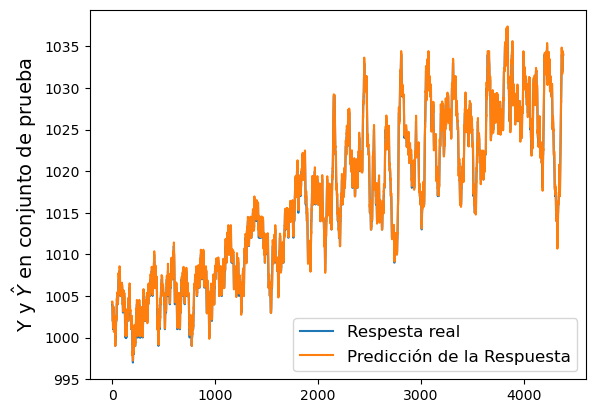

In [168]:
plt.plot(y_test)
plt.plot(prediction_test)
plt.legend(['Respesta real','Predicción de la Respuesta'],loc="best", fontsize=12)
plt.ylabel('Y y $\hat{Y}$ en conjunto de prueba', fontsize=14)

Text(0, 0.5, '$\\hat{e}$ en conjunto de prueba')

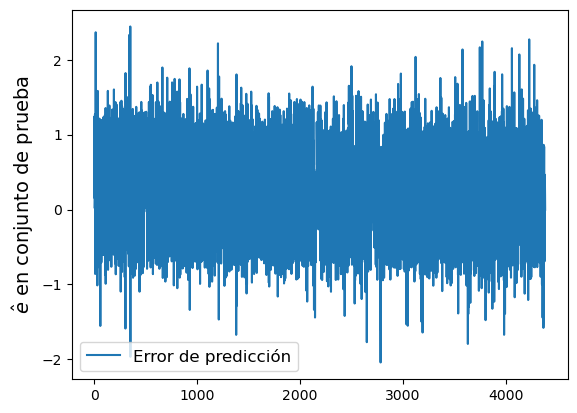

In [169]:
plt.plot(prediction_test-y_test)
plt.legend(['Error de predicción'],loc="best", fontsize=12)
plt.ylabel('$\hat{e}$ en conjunto de prueba', fontsize=14)

In [170]:
prediction_test-y_test

array([[ 3.11096191e-01],
       [ 2.19970703e-01],
       [ 1.24298096e+00],
       ...,
       [ 3.47778320e-01],
       [ 1.86279297e-01],
       [-1.22070312e-03]])